### 사전준비

In [1]:
# 기본적인 패키지 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 / 차트 마이너스
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='NanumSquare')
sns.set(font='NanumSquare', rc={'axes.unicode_minus':False}, style='darkgrid')

### 합성곱신경망 이미지 분류

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [6]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0   # 1: 이미지값을 넣을 부분
train_scaled.shape

(60000, 28, 28, 1)

In [7]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [10]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 만들기

In [12]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                  padding='same',   # 똑같이 28x28로 만듬
                                  input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))     # 14x14 특성맵이 32개 만들어짐
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))     # 7x7 특성맵이 64개 만들어짐

In [14]:
model.add(keras.layers.Flatten())   # 7x7 특성맵들을 다 펼쳐준다
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))    # 100개 중에서 60개 노드만 통과
model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [16]:
keras.utils.plot_model(model)   # 설치가 잘 안된다고 한다

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 모델 컴파일 훈련

In [17]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

checkpoint_cb = keras.callbacks.ModelCheckpoint('../data/best_cnn_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.5414 - accuracy: 0.8057
Epoch 1: val_loss improved from inf to 0.33620, saving model to ../data\best_cnn_model.h5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.5413 - accuracy: 0.8057 - val_loss: 0.3362 - val_accuracy: 0.8791
Epoch 2/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.3584 - accuracy: 0.8700
Epoch 2: val_loss improved from 0.33620 to 0.29833, saving model to ../data\best_cnn_model.h5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3583 - accuracy: 0.8701 - val_loss: 0.2983 - val_accuracy: 0.8898
Epoch 3/20
1500/1500 [==============================] - ETA: 0s - loss: 0.3101 - accuracy: 0.8897
Epoch 3: val_loss improved from 0.29833 to 0.26663, saving model to ../data\best_cnn_model.h5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3101 - accuracy: 0.8897 - val_loss: 0.2666 - val_accuracy: 0.9049
Epoch 4/20
1498/1500 [=

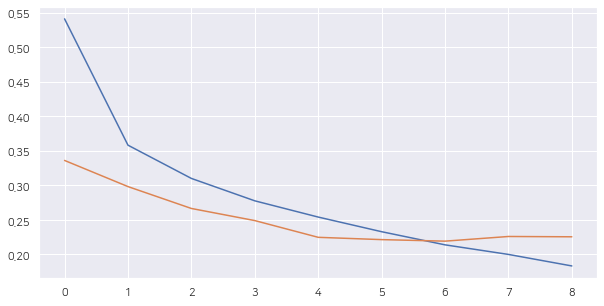

In [19]:
plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

In [20]:
early_stopping_cb.stopped_epoch

8

In [21]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 6ms/step - loss: 0.2193 - accuracy: 0.9180


[0.21928365528583527, 0.9179999828338623]

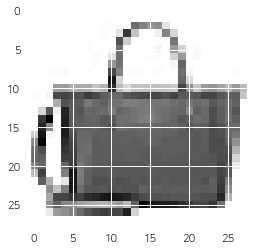

In [22]:
plt.imshow(X=val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [23]:
# 예측
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 93ms/step


array([[7.0805739e-16, 9.7028408e-23, 8.7957154e-19, 3.0677120e-18,
        4.8295794e-17, 2.6404645e-15, 1.5505016e-17, 1.3118710e-14,
        1.0000000e+00, 7.2726328e-17]], dtype=float32)

In [24]:
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=-1)
val_labels

1/1 [==============================] - 0s 20ms/step


array([8], dtype=int64)

In [25]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [26]:
print(classes[np.argmax(result)])

가방
